# Ejercicio 3

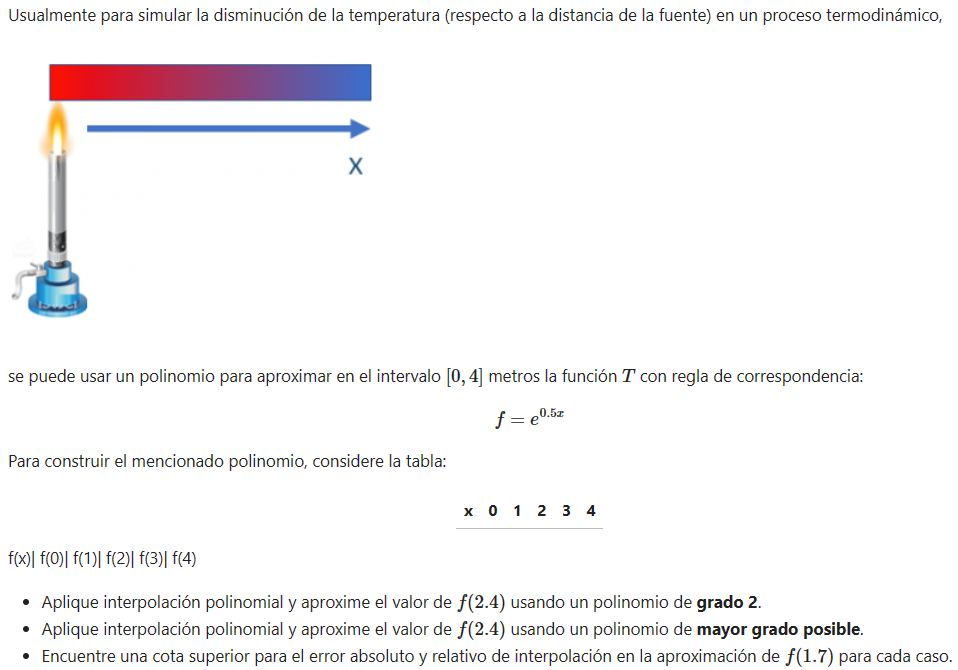

La función evaluada en 2.4 es: 3.3201169227365472
polinomio de 2do grado: 0.571979893356783*x**2 - 1.0964922249049*x + 2.6233467048417
Evaluando el polinomio: 3.2863695508050097
Error absoluto: 0.03374737193153754
Error relativo: 0.010268891373847771


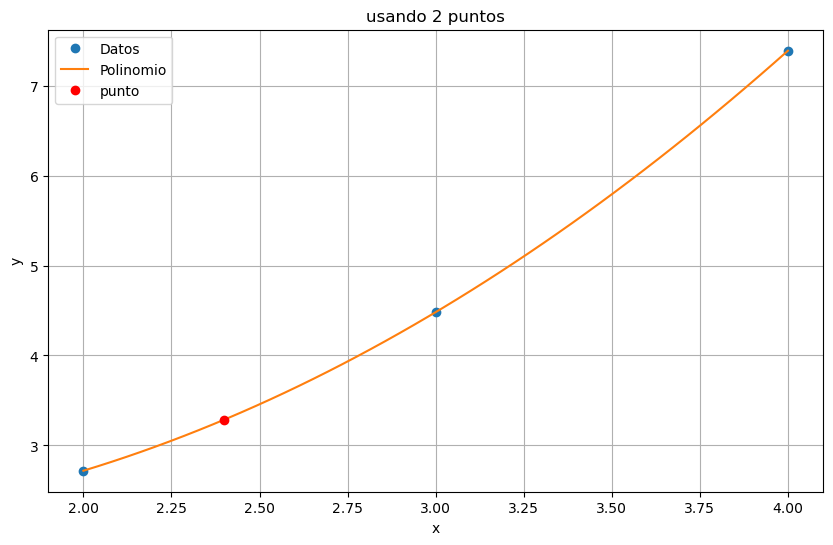

polinomio de mayor grado: 0.00737940439717288*x**4 + 0.00122480646051404*x**3 + 0.155089393367641*x**2 + 0.485027666474799*x + 1.0
polinomio evaluado en 2.4: 3.3191439571749184
Error absoluto: 0.0009729655616288468
Error relativo: 0.00029313749996459453


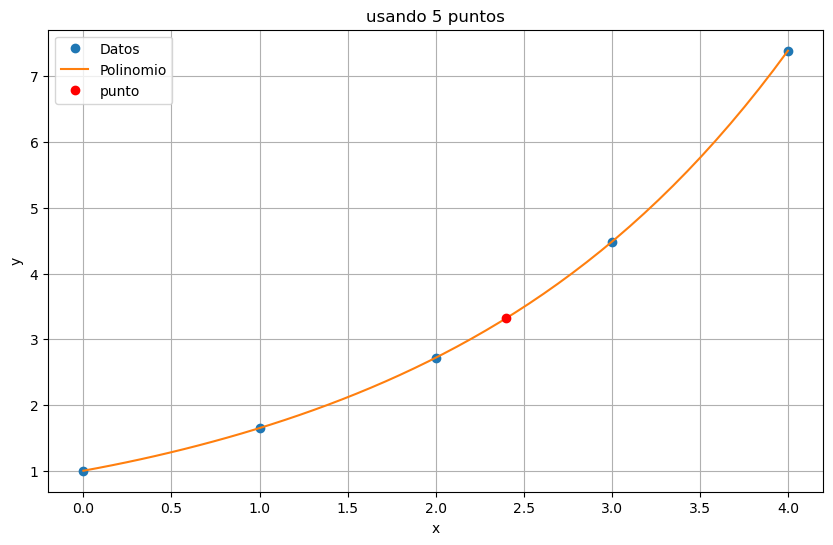

In [12]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Define la función
f = lambda x: np.exp(0.5 * x)

def legendre(dataxs, data_y):
    # n guarda un número de puntos del tamaño de los datos en x que tengamos
    n = dataxs.size
    x = sym.symbols('x')  # define x como variable
    polinomio = 0  # aquí se almacenará el polinomio

    for i in range(n):
        # l es un arreglo de unos, donde se guardarán los coeficientes de legendre y tiene el mismo tamaño que el número de puntos
        l = 1
        # Ciclos for para la fórmula de los coeficientes de legendre
        for k in range(n):
            # Condición, si k es igual a i, se lo salta
            if k != i:
                # Fórmula
                l *= ((x - dataxs[k]) / (dataxs[i] - dataxs[k]))
        polinomio += l*data_y[i]  # construyendo el polinomio

    # simplifica el polinomio
    polisimple = polinomio.expand().evalf()

    # evaluación numérica
    px = sym.lambdify(x, polisimple)
    
    return px, polisimple

print(f"La función evaluada en 2.4 es: {f(2.4)}")

# Utilizando tres puntos para un polinomio de segundo grado
x1 = np.array([2, 3, 4])
y1 = f(x1)
px, polisimple = legendre(x1, y1)
print(f"polinomio de 2do grado: {polisimple}")
print(f"Evaluando el polinomio: {px(2.4)}")

# Errores

# Solución analítica (evaluación de la función en 2.4)
solucion_analitica = f(2.4)

# Evaluación del polinomio de segundo grado en 2.4
polinomio_segundo_grado = px(2.4)

# Cálculo del error absoluto
error_absoluto = abs(solucion_analitica - polinomio_segundo_grado)
error_relativo = ((solucion_analitica - polinomio_segundo_grado)/ polinomio_segundo_grado)

print(f"Error absoluto: {error_absoluto}")
print(f"Error relativo: {error_relativo}")

xi = np.linspace(2, 4, 50)
plt.figure(figsize=(10, 6))
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.plot(2.4, px(2.4), 'ro', label = 'punto') 
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('usando 2 puntos')
plt.grid(True)
plt.show()

# Usando todos los puntos para obtener un polinomio del mayor grado posible
x1 = np.array([0, 1, 2, 3, 4])
y1 = f(x1)
px, polisimple = legendre(x1, y1)
print(f"polinomio de mayor grado: {polisimple}")
print(f"polinomio evaluado en 2.4: {px(2.4)}")

#Errores

# Solución analítica (evaluación de la función en 2.4)
solucion_analitica = f(2.4)

# Evaluación del polinomio de segundo grado en 2.4
polinomio_mayor_grado = px(2.4)

# Cálculo del error absoluto
error_absoluto = abs(solucion_analitica - polinomio_mayor_grado)
error_relativo = ((solucion_analitica - polinomio_mayor_grado)/ polinomio_mayor_grado)

print(f"Error absoluto: {error_absoluto}")
print(f"Error relativo: {error_relativo}")

xi = np.linspace(0, 4, 50)
plt.figure(figsize=(10, 6))
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.plot(2.4, px(2.4), 'ro', label = 'punto') 
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('usando 5 puntos')
plt.grid(True)
plt.show()